In [2]:

!pip install google-play-scraper
!pip install gensim

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [4]:
df = pd.read_csv('ulasan_aplikasi.csv')
df

,Review
0,Sejauh ini koleksi buku belum terlalu lengkap ...
1,"Sering bermasalah dgn sinyal, padahal sinyal s..."
2,"edit 2025: makin banyak buku yg ""terlalu ringa..."
3,Bagus! Mungkin banyak yang bilang tidak bisa m...
4,"Aplikasinya bagus banget, cuman ada beberapa k..."
...,...
9995,Bagus untuk saya karena saya butuh ilmu yang l...
9996,Kak mohon maaf ini kenapa saya nggak bisa logi...
9997,eror mulu ngga bagus ini haaahhh nyesel dah in...
9998,Kenapaa kaloo dibuka malemm hari malahh ga bis...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


# Preprocessing Text

In [6]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemmingText(words):  # menghapus kata imbuhan dan menjadikannya kata dasar
    # Lakukan stemming pada setiap kata dalam list
    return [stemmer.stem(word) for word in words]

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


def hapus_emoji(teks): #Menghapus data emoji
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emotikon wajah
        "\U0001F300-\U0001F5FF"  # simbol & pictogram
        "\U0001F680-\U0001F6FF"  # transport & map
        "\U0001F700-\U0001F77F"  # simbol tambahan
        "\U0001F780-\U0001F7FF"  # simbol tambahan lagi
        "\U0001F800-\U0001F8FF"  # simbol tambahan lainnya
        "\U0001F900-\U0001F9FF"  # emotikon tambahan
        "\U0001FA00-\U0001FA6F"  # simbol baru
        "\U0001FA70-\U0001FAFF"  # simbol baru lainnya
        "\u2600-\u26FF"          # simbol misalnya ☀, ☔, ⚡
        "\u2700-\u27BF"          # simbol panah, pensil, dll
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', teks)


In [16]:
with open('kbba.txt') as f:
  slangwords = dict(x.rstrip().split(None, 1) for x in f)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
from tqdm import tqdm
tqdm.pandas()  # Integrasi tqdm dengan pandas

clean_df = df.copy()

# Menghapus data yang mengandung emoji
clean_df['Review'] = clean_df['Review'].apply(hapus_emoji)

# Membersihkan teks dan menyimpan di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)

#Mengubah huruf dalam teks menjadi huru kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

#Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

#Memecah teks menjadi token dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizing'] = clean_df['text_slangwords'].apply(tokenizingText)

#Menghapus kata yang sering muncul tapi tidak memberikan informasi yang berarti
clean_df['text_stopword'] = clean_df['text_tokenizing'].apply(filteringText)

#Mengubah kata kata yang berimbuhan menjadi kata dasar
clean_df['text_stemming'] = clean_df['text_stopword'].progress_apply(stemmingText)

# Menggabungkan token-token menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stemming'].apply(toSentence)

# Menampilkan DataFrame hasil
clean_df

100%|██████████| 10000/10000 [18:04<00:00,  9.22it/s]


,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizing,text_stopword,text_stemming,text_akhir
0,Sejauh ini koleksi buku belum terlalu lengkap ...,Sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,"[sejauh, ini, koleksi, buku, belum, terlalu, l...","[koleksi, buku, lengkap, berdasarkan, genrepen...","[koleksi, buku, lengkap, dasar, genrepenulisny...",koleksi buku lengkap dasar genrepenulisnya fil...
1,"Sering bermasalah dgn sinyal, padahal sinyal s...",Sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dengan sinyal padahal sinyal...,"[sering, bermasalah, dengan, sinyal, padahal, ...","[bermasalah, sinyal, sinyal, loading, suka, ga...","[masalah, sinyal, sinyal, loading, suka, gagal...",masalah sinyal sinyal loading suka gagal reade...
2,"edit 2025: makin banyak buku yg ""terlalu ringa...",edit makin banyak buku yg terlalu ringan Sete...,edit makin banyak buku yg terlalu ringan sete...,edit makin banyak buku yang terlalu ringan set...,"[edit, makin, banyak, buku, yang, terlalu, rin...","[edit, buku, ringan, download, ulang, friendli...","[edit, buku, ringan, download, ulang, friendli...",edit buku ringan download ulang friendlistku h...
3,Bagus! Mungkin banyak yang bilang tidak bisa m...,Bagus Mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,"[bagus, mungkin, banyak, yang, bilang, tidak, ...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...",bagus bilang masuk ngelag aplikasi bagus masuk...
4,"Aplikasinya bagus banget, cuman ada beberapa k...",Aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget Cuma ada beberapa kek...,"[aplikasinya, bagus, banget, Cuma, ada, bebera...","[aplikasinya, bagus, banget, Cuma, kekurangan,...","[aplikasi, bagus, banget, cuma, kurang, ganggu...",aplikasi bagus banget cuma kurang ganggu masuk...
...,...,...,...,...,...,...,...,...
9995,Bagus untuk saya karena saya butuh ilmu yang l...,Bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,"[bagus, untuk, saya, karena, saya, butuh, ilmu...","[bagus, butuh, ilmu]","[bagus, butuh, ilmu]",bagus butuh ilmu
9996,Kak mohon maaf ini kenapa saya nggak bisa logi...,Kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya tidak bisa logi...,"[kak, mohon, maaf, ini, kenapa, saya, tidak, b...","[kak, mohon, maaf, login]","[kak, mohon, maaf, login]",kak mohon maaf login
9997,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror melulu tidak bagus ini haaahhh nyesel deh...,"[eror, melulu, tidak, bagus, ini, haaahhh, nye...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...",eror melulu bagus haaahhh nyesel deh instal
9998,Kenapaa kaloo dibuka malemm hari malahh ga bis...,Kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh tidak ...,"[kenapaa, kaloo, dibuka, malemm, hari, malahh,...","[kenapaa, kaloo, dibuka, malemm, malahh, bisaa...","[kenapaa, kaloo, buka, malemm, malahh, bisaa, ...",kenapaa kaloo buka malemm malahh bisaa aplikas...


In [18]:
# Ganti semua string kosong atau hanya spasi jadi NaN
clean_df = clean_df.replace(r'^\s*$', np.nan, regex=True)

#Menghapus baris yang memiliki nilai null
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizing,text_stopword,text_stemming,text_akhir
0,Sejauh ini koleksi buku belum terlalu lengkap ...,Sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,"[sejauh, ini, koleksi, buku, belum, terlalu, l...","[koleksi, buku, lengkap, berdasarkan, genrepen...","[koleksi, buku, lengkap, dasar, genrepenulisny...",koleksi buku lengkap dasar genrepenulisnya fil...
1,"Sering bermasalah dgn sinyal, padahal sinyal s...",Sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dengan sinyal padahal sinyal...,"[sering, bermasalah, dengan, sinyal, padahal, ...","[bermasalah, sinyal, sinyal, loading, suka, ga...","[masalah, sinyal, sinyal, loading, suka, gagal...",masalah sinyal sinyal loading suka gagal reade...
2,"edit 2025: makin banyak buku yg ""terlalu ringa...",edit makin banyak buku yg terlalu ringan Sete...,edit makin banyak buku yg terlalu ringan sete...,edit makin banyak buku yang terlalu ringan set...,"[edit, makin, banyak, buku, yang, terlalu, rin...","[edit, buku, ringan, download, ulang, friendli...","[edit, buku, ringan, download, ulang, friendli...",edit buku ringan download ulang friendlistku h...
3,Bagus! Mungkin banyak yang bilang tidak bisa m...,Bagus Mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,"[bagus, mungkin, banyak, yang, bilang, tidak, ...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...",bagus bilang masuk ngelag aplikasi bagus masuk...
4,"Aplikasinya bagus banget, cuman ada beberapa k...",Aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget Cuma ada beberapa kek...,"[aplikasinya, bagus, banget, Cuma, ada, bebera...","[aplikasinya, bagus, banget, Cuma, kekurangan,...","[aplikasi, bagus, banget, cuma, kurang, ganggu...",aplikasi bagus banget cuma kurang ganggu masuk...
...,...,...,...,...,...,...,...,...
9995,Bagus untuk saya karena saya butuh ilmu yang l...,Bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,"[bagus, untuk, saya, karena, saya, butuh, ilmu...","[bagus, butuh, ilmu]","[bagus, butuh, ilmu]",bagus butuh ilmu
9996,Kak mohon maaf ini kenapa saya nggak bisa logi...,Kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya tidak bisa logi...,"[kak, mohon, maaf, ini, kenapa, saya, tidak, b...","[kak, mohon, maaf, login]","[kak, mohon, maaf, login]",kak mohon maaf login
9997,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror melulu tidak bagus ini haaahhh nyesel deh...,"[eror, melulu, tidak, bagus, ini, haaahhh, nye...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...",eror melulu bagus haaahhh nyesel deh instal
9998,Kenapaa kaloo dibuka malemm hari malahh ga bis...,Kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh tidak ...,"[kenapaa, kaloo, dibuka, malemm, hari, malahh,...","[kenapaa, kaloo, dibuka, malemm, malahh, bisaa...","[kenapaa, kaloo, buka, malemm, malahh, bisaa, ...",kenapaa kaloo buka malemm malahh bisaa aplikas...


In [19]:
clean_df.to_csv('dataset_clean.csv', index=False)

# Pelabelan

In [20]:
from operator import le
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari Github
lexicon_positive_dict = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive_dict[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")


# Membaca data dari kamus kata-kata negatif dari github
lexicon_negative_dict = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive_dict[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch negative lexicon data")


In [21]:
# Fungsi untuk menentukan polaritas sentimen dari ulasan pengguna

def sentiment_analysis_lexicon(text):
    score = 0

    for word in text:
        if (word in lexicon_positive_dict):
            score += lexicon_positive_dict[word]

    for word in text:
        if (word in lexicon_negative_dict):
            score += lexicon_negative_dict[word]

    sentiment = ''

    if (score > 0):
        sentiment = 'positif'
    elif (score < 0):
        sentiment = 'negatif'
    else:
        sentiment = 'netral'

    return sentiment, score

In [22]:
text = 'bagus butuh ilmu'
baru = text.lower().split()
print(baru)
print(sentiment_analysis_lexicon(baru))


['bagus', 'butuh', 'ilmu']
('negatif', -5)


In [23]:
results = clean_df['text_stemming'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
clean_df['sentiment'] = results[0]
clean_df['score'] = results[1]

clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizing,text_stopword,text_stemming,text_akhir,sentiment,score
0,Sejauh ini koleksi buku belum terlalu lengkap ...,Sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,"[sejauh, ini, koleksi, buku, belum, terlalu, l...","[koleksi, buku, lengkap, berdasarkan, genrepen...","[koleksi, buku, lengkap, dasar, genrepenulisny...",koleksi buku lengkap dasar genrepenulisnya fil...,negatif,-10
1,"Sering bermasalah dgn sinyal, padahal sinyal s...",Sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dengan sinyal padahal sinyal...,"[sering, bermasalah, dengan, sinyal, padahal, ...","[bermasalah, sinyal, sinyal, loading, suka, ga...","[masalah, sinyal, sinyal, loading, suka, gagal...",masalah sinyal sinyal loading suka gagal reade...,negatif,-24
2,"edit 2025: makin banyak buku yg ""terlalu ringa...",edit makin banyak buku yg terlalu ringan Sete...,edit makin banyak buku yg terlalu ringan sete...,edit makin banyak buku yang terlalu ringan set...,"[edit, makin, banyak, buku, yang, terlalu, rin...","[edit, buku, ringan, download, ulang, friendli...","[edit, buku, ringan, download, ulang, friendli...",edit buku ringan download ulang friendlistku h...,negatif,-30
3,Bagus! Mungkin banyak yang bilang tidak bisa m...,Bagus Mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,bagus mungkin banyak yang bilang tidak bisa ma...,"[bagus, mungkin, banyak, yang, bilang, tidak, ...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...","[bagus, bilang, masuk, ngelag, aplikasi, bagus...",bagus bilang masuk ngelag aplikasi bagus masuk...,negatif,-39
4,"Aplikasinya bagus banget, cuman ada beberapa k...",Aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget cuman ada beberapa ke...,aplikasinya bagus banget Cuma ada beberapa kek...,"[aplikasinya, bagus, banget, Cuma, ada, bebera...","[aplikasinya, bagus, banget, Cuma, kekurangan,...","[aplikasi, bagus, banget, cuma, kurang, ganggu...",aplikasi bagus banget cuma kurang ganggu masuk...,negatif,-38
...,...,...,...,...,...,...,...,...,...,...
9995,Bagus untuk saya karena saya butuh ilmu yang l...,Bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,bagus untuk saya karena saya butuh ilmu yang l...,"[bagus, untuk, saya, karena, saya, butuh, ilmu...","[bagus, butuh, ilmu]","[bagus, butuh, ilmu]",bagus butuh ilmu,negatif,-5
9996,Kak mohon maaf ini kenapa saya nggak bisa logi...,Kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya nggak bisa logi...,kak mohon maaf ini kenapa saya tidak bisa logi...,"[kak, mohon, maaf, ini, kenapa, saya, tidak, b...","[kak, mohon, maaf, login]","[kak, mohon, maaf, login]",kak mohon maaf login,negatif,-5
9997,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror mulu ngga bagus ini haaahhh nyesel dah in...,eror melulu tidak bagus ini haaahhh nyesel deh...,"[eror, melulu, tidak, bagus, ini, haaahhh, nye...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...","[eror, melulu, bagus, haaahhh, nyesel, deh, in...",eror melulu bagus haaahhh nyesel deh instal,negatif,-16
9998,Kenapaa kaloo dibuka malemm hari malahh ga bis...,Kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh ga bis...,kenapaa kaloo dibuka malemm hari malahh tidak ...,"[kenapaa, kaloo, dibuka, malemm, hari, malahh,...","[kenapaa, kaloo, dibuka, malemm, malahh, bisaa...","[kenapaa, kaloo, buka, malemm, malahh, bisaa, ...",kenapaa kaloo buka malemm malahh bisaa aplikas...,negatif,-3


In [24]:
clean_df['sentiment'].value_counts()

,count
sentiment,
negatif,8619
positif,928
netral,453


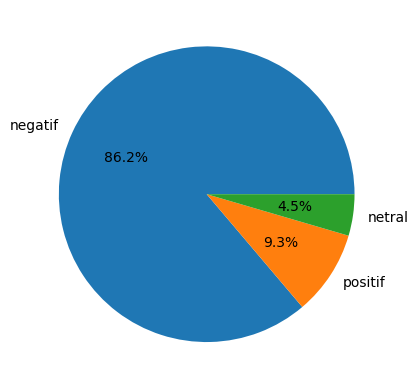

In [25]:
plt.pie(clean_df['sentiment'].value_counts(), labels=clean_df['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.show()

# Eksplorasi Label

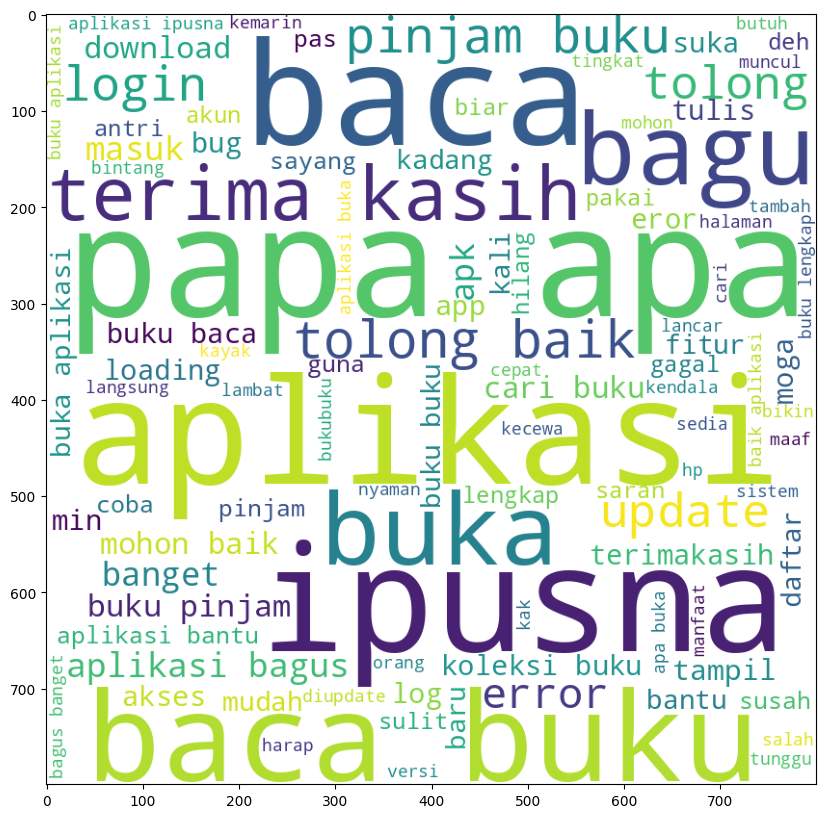

In [26]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
# WordCloudGeneral
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS,
               width=800,
               height=800
               )

wc.generate(" ".join(clean_df['text_akhir']))
plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.show()

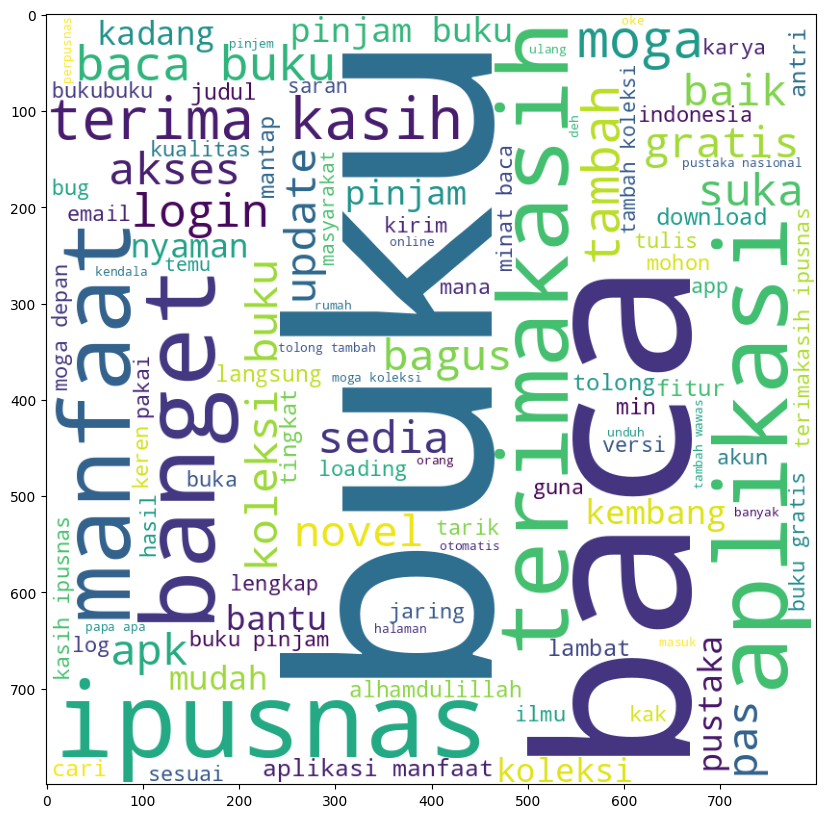

In [27]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
# WordCloud POSITIF
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS,
               width=800,
               height=800
               )

wc.generate(" ".join(clean_df[clean_df['sentiment']=='positif']['text_akhir']))
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.show()

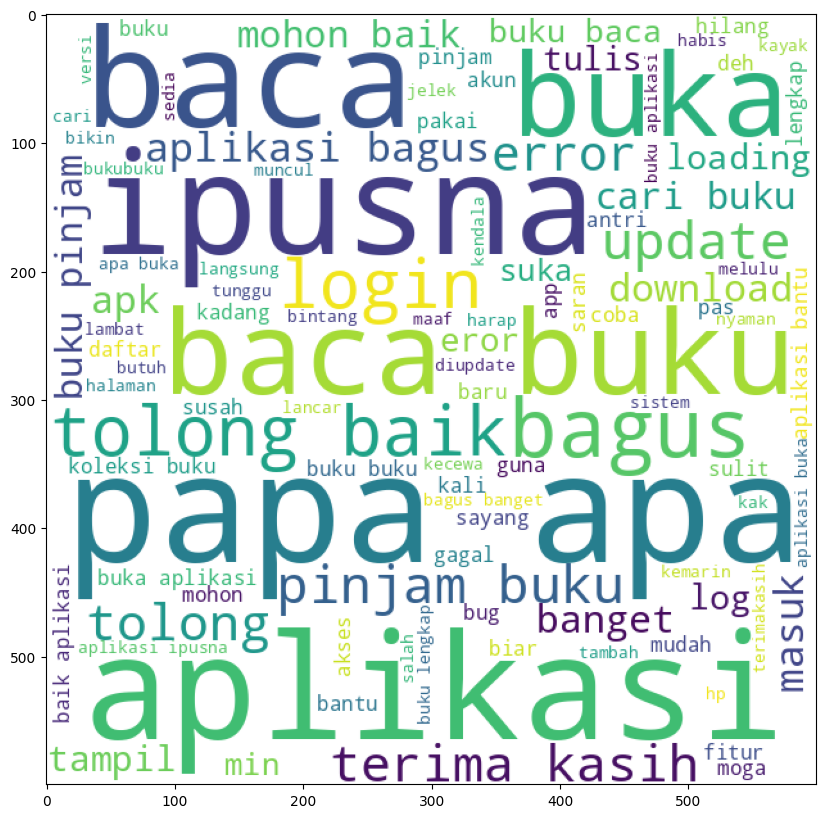

In [28]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
# WordCloud POSITIF
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS,
               width=600,
               height=600
               )

wc.generate(" ".join(clean_df[clean_df['sentiment']=='negatif']['text_akhir']))
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.show()

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF serta Modelling dengan Logistic Regression

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur dan label
X = clean_df['text_akhir']
y = clean_df['sentiment']

# Ekstraksi Fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=18, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi Hasil Ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,ajar,akses,akun,alhamdulillah,ambil,anak,aneh,antri,apa,...,uang,ubah,ulang,unduh,uninstall,update,verifikasi,versi,wifi,yah
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.199525,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', round(accuracy_train_lr, 2))
print('Logistic Regression - accuracy_test:', round(accuracy_test_lr, 2))

Logistic Regression - accuracy_train: 0.92
Logistic Regression - accuracy_test: 0.92


## Ekstraksi Fitur dengan TF-IDF serta Modelling dengan Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.992625
Random Forest - accuracy_test: 0.8975


In [33]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8905
Naive Bayes - accuracy_test: 0.892


# Data Splitting dan Ekstraksi Fitur dengan Word2Vec serta Modelling dengan SVM

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# Pisahkan data menjadi fitur dan label
X = clean_df['text_stemming']
y = clean_df['sentiment']

# Ekstraksi Fitur dengan TF-IDF
model = Word2Vec(sentences=clean_df['text_stemming'], vector_size=100, window=5, min_count=1, workers=4)

# Fungsi untuk menghitung rata-rata vektor dari setiap kalimat
def get_avg_vector(words, model, vector_size):
    feature_vec = np.zeros((vector_size,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            feature_vec = np.add(feature_vec, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

# Ekstrak fitur untuk semua ulasan
features = X.apply(lambda x: get_avg_vector(x, model, 100))

# Ubah menjadi DataFrame
features_df = pd.DataFrame(features.tolist())

# Tampilkan hasil
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.418743,0.606669,-0.105695,-0.209350,-0.274441,-0.764914,0.055149,0.953223,-0.272006,-0.164527,...,0.484114,-0.048189,0.316392,-0.144262,0.569203,0.573542,0.252098,-0.540452,0.041368,-0.333017
1,-0.324027,0.762218,-0.151996,-0.207289,-0.321411,-0.864078,-0.011808,0.955329,-0.328766,-0.278026,...,0.666179,-0.022661,0.283571,-0.161880,0.535698,0.522674,0.266469,-0.571271,0.032950,-0.330240
2,-0.307485,0.626680,-0.122510,-0.227774,-0.258196,-0.674313,-0.014715,0.770244,-0.251535,-0.150480,...,0.484485,-0.046340,0.266091,-0.170901,0.427990,0.470334,0.198001,-0.457599,0.026718,-0.271118
3,-0.312590,0.766477,-0.145797,-0.189642,-0.325702,-0.930110,0.023598,0.963001,-0.405494,-0.360070,...,0.707920,0.034583,0.294145,-0.157750,0.614222,0.506572,0.278022,-0.579342,0.005919,-0.367845
4,-0.195441,0.720815,-0.119376,-0.116113,-0.308449,-0.937844,0.100105,0.934617,-0.460335,-0.504978,...,0.748671,0.116578,0.221915,-0.078003,0.652444,0.429465,0.272450,-0.579199,0.002984,-0.346741


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1. Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.3, random_state=42)

# 2. Buat dan latih model SVM
svm_model = SVC(kernel='linear')  # kamu bisa coba juga 'rbf' atau 'poly'
svm_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_train_svm = svm_model.predict(X_train)
y_pred_svm = svm_model.predict(X_test)

# 4. Evaluasi akurasi
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)

# 4. Evaluasi
print("Akurasi Training SVM: ", accuracy_train_svm)
print("Akurasi Testing SVM: ", accuracy_test_svm)


Akurasi Training SVM:  0.8602857142857143
Akurasi Testing SVM:  0.8656666666666667


## Ekstraksi Fitur dengan Word2Vec serta Modelling dengan LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42)

# 1. Inisialisasi model
logreg = LogisticRegression(max_iter=1000)

# 2. Latih model dengan data training
logreg.fit(X_train, y_train)

# 3. Prediksi pada data training dan testing
y_pred_train_lr = logreg.predict(X_train)
y_pred_test_lr = logreg.predict(X_test)

# 4. Evaluasi akurasi
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print("Akurasi Training (Logistic Regression):", accuracy_train_lr)
print("Akurasi Testing (Logistic Regression):", accuracy_test_lr)


Akurasi Training (Logistic Regression): 0.8635
Akurasi Testing (Logistic Regression): 0.872


# Testing Model Logistic Regression

In [37]:
review_baru = ["Aplikasinya jelek banyak eror"]

hasil_prediksi = logistic_regression.predict(tfidf.transform(review_baru))

print(hasil_prediksi)

['negatif']


In [4]:
!pip install pipreqs

In [13]:
!pipreqs "/content" --force --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt
